### Importación de librerías en Python

Este fragmento de código importa tres librerías útiles para análisis de grafos, visualización y herramientas de inspección en Python.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import inspect

### Creación y visualización de un grafo con NetworkX

A continuación se muestra cómo crear un grafo NO DIRIGIDO utilizando la librería `networkx`. El grafo representa una serie de estaciones conectadas por tramos con pesos que podrían simbolizar, por ejemplo, distancias o tiempos de trayecto.

Creamos el grafo partir de la siguiente red de metro:
- Sol - Gran vía - 2min
- Gran vía - Callao - 1min
- Callao - Santo Domingo - 2min
- Santo Domingo - Noviciado - 1min
- Noviciado - San Bernardo - 2min
- San Bernardo - Bilbao - 3min
- Bilbao - Tribunal - 2min
- Trubunal  - Chueca - 2min
- Chueca - Sevilla - 2min
- Sevilla -  Barco de España - 2min
- Banco de España - Retiro - 3min
- Retiro - Goya - 2min
- Goya - Manuel Becerra - 3min 
- Manuel Becerra - Ventas - 2min
- Ventas - Aeropuerto T1 T2 T3 - 6min

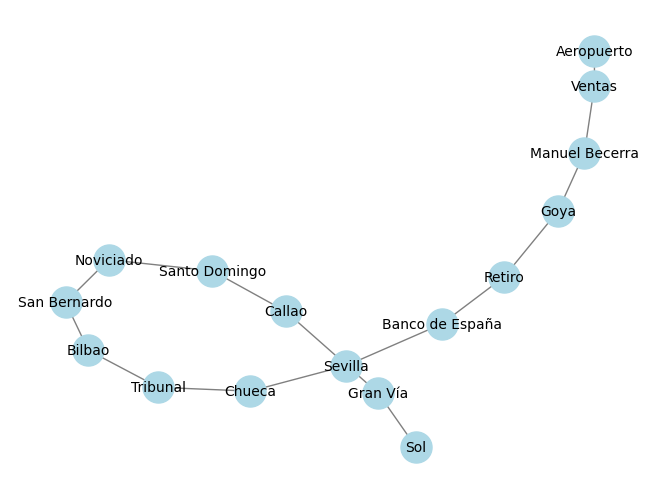

In [2]:
# Crear el grafo
G = nx.Graph()
G.add_weighted_edges_from([
    ("Sol", "Gran Vía", 2), 
    ("Gran Vía", "Callao", 1), 
    ("Callao", "Santo Domingo", 2), 
    ("Santo Domingo", "Noviciado", 1), 
    ("Noviciado", "San Bernardo", 2), 
    ("San Bernardo", "Bilbao", 3), 
    ("Bilbao", "Tribunal", 2), 
    ("Tribunal", "Chueca", 2), 
    ("Chueca", "Sevilla", 2), 
    ("Sevilla", "Banco de España", 2), 
    ("Banco de España", "Retiro", 3), 
    ("Retiro", "Goya", 2), 
    ("Goya", "Manuel Becerra", 3), 
    ("Manuel Becerra", "Ventas", 2), 
    ("Ventas", "Aeropuerto", 6)
])
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

### **Dijkstra-Camino más corto en un grafo con Pesos**

Utilizando el algoritmo de Dijkstra proporcionado por NetworkX, se puede calcular el camino más corto entre dos nodos en el grafo, teniendo en cuenta los pesos asignados a las aristas.

**¿Cuál es el camino más corto de Sol a Aeropuerto T1-T2-T3 y por que estaciones pasa?**

In [3]:
# Calcular el camino más corto desde Sol al Aeropuerto
shortest_path = nx.dijkstra_path(G, source="Sol", target="Aeropuerto", weight="weight")
print("El Camino más corto de Sol al Aeropueto:", shortest_path)

El Camino más corto de Sol al Aeropueto: ['Sol', 'Gran Vía', 'Callao', 'Santo Domingo', 'Noviciado', 'San Bernardo', 'Bilbao', 'Tribunal', 'Chueca', 'Sevilla', 'Banco de España', 'Retiro', 'Goya', 'Manuel Becerra', 'Ventas', 'Aeropuerto']


### Tiempo total del camino más corto

Además del recorrido, también podemos calcular la **distancia total** (o tiempo estimado de viaje) desde el nodo de origen a cualquier otro nodo usando `nx.dijkstra_path_length`.

**¿Cuál es el coste total en minutos?**

In [4]:
# Camino más corto desde Sol a todos los nodos

shortest_distance = nx.dijkstra_path_length(G, source="Sol", target="Aeropuerto", weight="weight")
print(f"Tiempo total de viaje: {shortest_distance} minutos ")

Tiempo total de viaje: 35 minutos 


### Centralidad de Intermediación

La **centralidad de intermediación** mide la importancia de un nodo en cuanto a la cantidad de caminos más cortos que pasan por él. Es útil para identificar estaciones clave en una red de transporte.

A continuación, se calcula la centralidad de intermediación ponderada por el peso de las aristas, se ordenan los nodos según su valor y se imprimen las 10 estaciones más importantes según esta métrica.

**Extrae las 10 estaciones con mayor centralidad de intermediación y ordenalas de mayor a menor**

In [5]:
# Centralidad de intermediación
intermediacion = nx.betweenness_centrality(G, weight='weight')

# Ordenar el diccionario por los valores
intermediacion_ordenado = dict(sorted(intermediacion.items(), key=lambda item: item[1], reverse=True))
primeras_10_estaciones = list(intermediacion_ordenado.items())[:10]

print(f"""10 Estaciones con mayor centralidad de intermediación: 
{primeras_10_estaciones[0][0]} : {primeras_10_estaciones[0][1]}
{primeras_10_estaciones[1][0]} : {primeras_10_estaciones[1][1]}
{primeras_10_estaciones[2][0]} : {primeras_10_estaciones[2][1]}
{primeras_10_estaciones[3][0]} : {primeras_10_estaciones[3][1]}
{primeras_10_estaciones[4][0]} : {primeras_10_estaciones[4][1]}
{primeras_10_estaciones[5][0]} : {primeras_10_estaciones[5][1]}
{primeras_10_estaciones[6][0]} : {primeras_10_estaciones[6][1]}
{primeras_10_estaciones[7][0]} : {primeras_10_estaciones[7][1]}
{primeras_10_estaciones[8][0]} : {primeras_10_estaciones[8][1]}
{primeras_10_estaciones[9][0]} : {primeras_10_estaciones[9][1]}
""")


10 Estaciones con mayor centralidad de intermediación: 
Tribunal : 0.5333333333333334
Chueca : 0.5333333333333334
Bilbao : 0.5142857142857143
Sevilla : 0.5142857142857143
San Bernardo : 0.4761904761904762
Banco de España : 0.4761904761904762
Noviciado : 0.4190476190476191
Retiro : 0.4190476190476191
Santo Domingo : 0.34285714285714286
Goya : 0.34285714285714286



### Centralidad de Vector Propio (Eigenvector Centrality)

La **centralidad de vector propio** asigna puntuaciones a los nodos en función de la influencia que tienen, considerando también la influencia de sus vecinos. Es especialmente útil en redes donde la "conexión con nodos importantes" es más valiosa que simplemente tener muchas conexiones.

⚠️ Este cálculo solo es válido para grafos **fuertemente conexos**. Si el grafo no cumple con esta condición, el algoritmo puede no converger.


**Ordena las estaciones según cada tipo de centralidad y compare:** 
- **¿Cuál sería la estación más "influyente"? (vector propio)**

In [6]:

# Calcular la centralidad de vector propio
# Eigenvector centrality (solo si el grafo es fuertemente conexo)
try:
    eigen = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
except nx.PowerIterationFailedConvergence:
    print("❌ No se logró la convergencia. Aumenta 'max_iter' o revisa si el grafo es conexo.")
    
nodo_mas_influyente = max(eigen, key=eigen.get)

print(f"La estación mas influyente es: {nodo_mas_influyente}")

La estación mas influyente es: Ventas


### Estación más crítica según centralidad de intermediación

Después de calcular la centralidad de intermediación para cada nodo, se puede identificar cuál es la estación más **crítica** dentro de la red. Esta será la estación por la que pasa la mayor cantidad de caminos más cortos entre pares de nodos.

**¿La más crítica? (intermediación)**

In [7]:
# Centralidad de intermediación
nodo_mas_critico = max(intermediacion, key=intermediacion.get)
print(f"La estación mas crítica es: {nodo_mas_critico}")

La estación mas crítica es: Tribunal


### Centralidad de Grado

La **centralidad de grado** mide cuántas conexiones directas tiene cada nodo. En una red de transporte, esto representa cuántas estaciones están directamente conectadas a una estación específica.

A continuación, se calcula la centralidad de grado para todas las estaciones y se identifica  la estación **mejor conectada**.


In [8]:
# Centralidad de grado
grado = nx.degree_centrality(G)
nodo_mejor_conectado = max(grado, key=grado.get)
print(f"La estación mejor conectada: {nodo_mejor_conectado}")


La estación mejor conectada: Gran Vía


### Centralidad de Cercanía

La **centralidad de cercanía** evalúa qué tan accesible es un nodo respecto a todos los demás, basándose en la distancia total (ponderada) hacia los demás nodos. Una estación con alta centralidad de cercanía puede llegar rápidamente al resto de estaciones de la red.

**¿La más accesible desde otras? (cercanía)**


In [9]:

# Centralidad de cercanía
cercania = nx.closeness_centrality(G, distance='weight')
nodo_mas_cerca = max(cercania, key=cercania.get)
print(f"La estación mas accesible desde otras: {nodo_mas_cerca}")

La estación mas accesible desde otras: Tribunal
